In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("white");
sns.set_color_codes(palette='pastel');

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

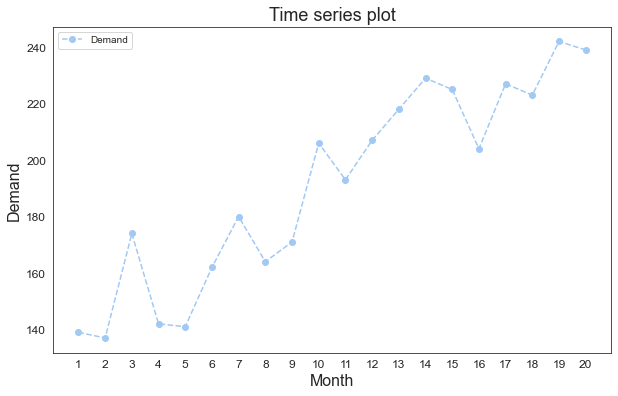

In [2]:
data = pd.read_excel('data/Time_series.xlsx')
# data.head()
fig, ax = plt.subplots(figsize = (10, 6))
labels = data['Month']
plt.plot(data['Month'], data['Demand'], 'bo--', label= 'Demand')
plt.xticks(data['Month'], labels)
plt.title('Time series plot', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.legend()
# save_fig('Figure1_TimeSeries')
plt.show()

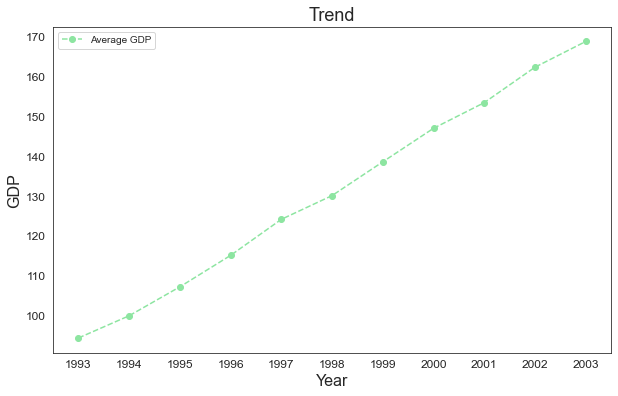

In [3]:
Year =     [1993,
            1994,
            1995,
            1996,
            1997,
            1998,
            1999,
            2000,
            2001,
            2002,
            2003]
GDP =  [94.43,
        100.00,
        107.25,
        115.13,
        124.16,
        130.11,
        138.57,
        146.97,
        153.40,
        162.28,
        168.73]
data = pd.DataFrame(list(zip(Year, GDP)), columns = ['Year', 'GDP'])

fig, ax = plt.subplots(figsize = (10, 6))
labels = data['Year']
plt.plot(data['Year'], data['GDP'], 'go--', label= 'Average GDP')
plt.xticks(data['Year'], labels)
plt.title('Trend', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP', fontsize=16)
plt.legend()
# save_fig('Figure2_Trend')
plt.show()


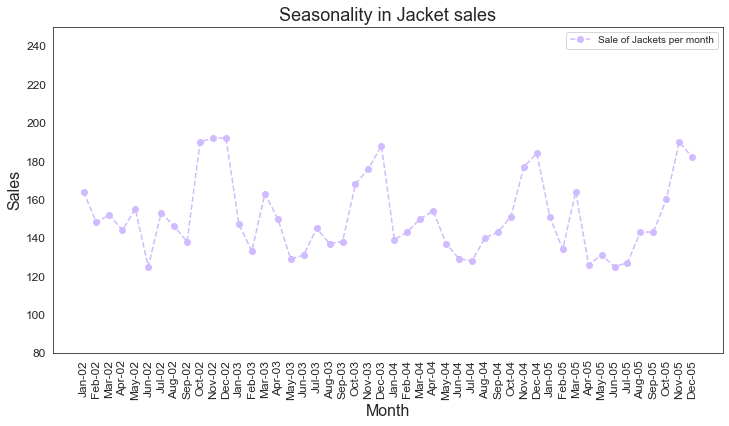

In [4]:
data = pd.read_csv('data/Branded_Jackets.csv')
data['MA'] = data.Sales.rolling(window=5).mean()
# data.head()
fig, ax = plt.subplots(figsize = (12, 6))
labels = data['Month']
plt.plot(data['Month'], data['Sales'], 'mo--', label= 'Sale of Jackets per month')
plt.xticks(data['Month'], labels, rotation = 90)
plt.title('Seasonality in Jacket sales', fontsize=18)
plt.ylim((80, 250)) 
plt.xlabel('Month', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend()
# save_fig('Figure3_Seasonality')
plt.show()

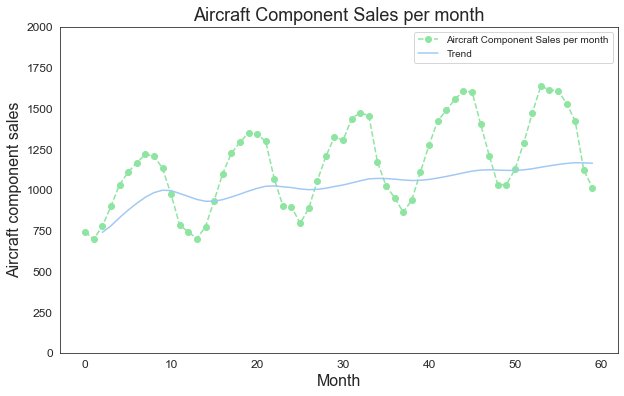

In [5]:
data = pd.read_csv('data/Aircraft_Component.csv')
data['MA'] = data.Sales.expanding(min_periods=3).mean()
# data.head()
fig, ax = plt.subplots(figsize = (10, 6))
# labels = data['Month']
plt.plot(data['Sales'], 'go--', label= 'Aircraft Component Sales per month')
plt.plot(data['MA'], 'b-', label= 'Trend')
# plt.xticks(data['Month'], labels, rotation = 90)
plt.title('Aircraft Component Sales per month', fontsize=18)
plt.ylim((0, 2000)) 
plt.xlabel('Month', fontsize=16)
plt.ylabel('Aircraft component sales', fontsize=16)
plt.legend()
# save_fig('Figure4_Trend_Seasonality')
plt.show()

In [6]:
data = pd.read_csv('data/shampoo-sales.csv', names = ['month', 'sales'], header = None)
data.head()

,month,sales
0,01-Jan,266.0
1,01-Feb,145.9
2,01-Mar,183.1
3,01-Apr,119.3
4,01-May,180.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   36 non-null     object 
 1   sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [8]:
import datetime as dt
data['month'] = data['month'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d-%b'))
data.head()

,month,sales
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   36 non-null     datetime64[ns]
 1   sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


### Introduction to <code>datetime</code>

In [10]:
from datetime import datetime

# get current date
datetime_object = datetime.now()
print(datetime_object)
print('Type :- ',type(datetime_object))

2021-03-21 20:09:33.040117
Type :-  <class 'datetime.datetime'>


In [11]:
my_string = '2019-10-31'

# Create date object in given time format yyyy-mm-dd
my_date = datetime.strptime(my_string, "%Y-%m-%d")

print(my_date)
print('Type: ',type(my_date))

2019-10-31 00:00:00
Type:  <class 'datetime.datetime'>


In [12]:
print('Month: ', my_date.month) # To Get month from date
print('Year: ', my_date.year) # To Get month from year

Month:  10
Year:  2019


In [13]:
# import calendar module
import calendar
print('Day of Month:', my_date.day)

# to get name of day(in number) from date
print('Day of Week (number): ', my_date.weekday())

# to get name of day from date
print('Day of Week (name): ', calendar.day_name[my_date.weekday()])

Day of Month: 31
Day of Week (number):  3
Day of Week (name):  Thursday
